# Reading data from a CSV file

## A Clean CSV
Suppose that the CSV file has the following data

|width|height|color|type|
|---|---|---|---|
|5  |20|green|square|
|6  |17|orange|triangle|
|2.5|17|orange|triangle|
|7  |21|green |square|
|5  |15|yellow|circle|

We can use the read_csv function from pandas to read in a CSV file. It will return a pandas Dataframe.  Read more about pandas Dataframes here:  http://pandas.pydata.org//pandas-docs//stable//generated/pandas.DataFrame.html

While pandas will let us do some basic scatter plot, matplotlib gives us more contraol. Read about matplotlib scatter plots here:https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

Read about the markers you can use here: https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

Using numpy, we can create masking arrays.  Any data value that is masked using the s parameter will not show up.  Read about masking here:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.masked_where.html#numpy.ma.masked_where




   width  height   color      type
0    5.0      20   green    square
1    6.0      17  orange  triangle
2    2.5      17  orange  triangle
3    7.0      21   green    square
4    5.0      15  yellow    circle
Index(['width', 'height', 'color', 'type'], dtype='object')
   width  height   color      type
0    5.0      20   green    square
1    6.0      17  orange  triangle
2    2.5      17  orange  triangle
3    7.0      21   green    square
4    5.0      15  yellow    circle
green     2
orange    2
yellow    1
Name: color, dtype: int64
triangle    2
square      2
circle      1
Name: type, dtype: int64
17    2
15    1
21    1
20    1
Name: height, dtype: int64


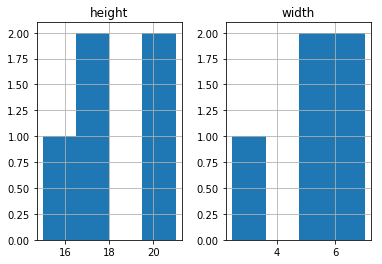

           width    height
width   1.000000  0.457453
height  0.457453  1.000000


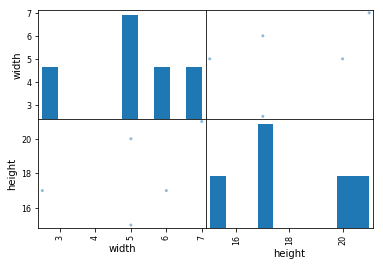

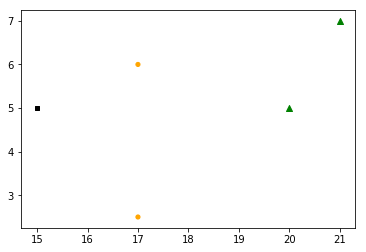

In [29]:
import pandas as pd

data = pd.read_csv("clean.csv")
print(data)
print(data.keys())
data.head()
# Same data with an empty line

data = pd.read_csv("emptyrow.csv")
print(data)


print(data["color"].value_counts())
print(data["type"].value_counts())
print(data["height"].value_counts())

import matplotlib.pyplot as plt
# Start a new plot
data.hist(bins=4)
plt.show()

#data.head()

correlations = data.corr()
print(correlations)
correlations["height"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix
attributes = ["color", "width", "height"]
scatter_matrix(data[attributes])
plt.show()

#Start a new scatter plot
# Create a mask so that only certain points are plotted.  Each result
# is an array like thing.  The first parameter is the test and the second
# is what to apply it to
import numpy as np
choice1 = np.ma.masked_where(data["color"] != "green", data["height"])
choice2 = np.ma.masked_where(data["color"] != "orange", data["height"])
choice3 = np.ma.masked_where(data["color"] != "yellow", data["height"])

# Use a different marker on each of the three types
plt.scatter(x=choice1,y=data["width"], marker="^", c="green")
plt.scatter(x=choice2,y=data["width"], s=choice2, marker="o", c="orange")
plt.scatter(x=choice3,y=data["width"], s=choice3, marker="s", c="black")
plt.show()




## A messy CSV

If we are missing values or have some values that are not consistent with the other values in the field, interesting things can happen.

messy1.csv
```text
“index”, “gender”, age at death, “breed”
1, Male , 10, Basset Hound
2, Male, 4, Golden Retriever
3, Female, 2, Basset Hound
4, Male, 13; Collie
5, female, , Dachshound
6, F, five, Poodle
7, Female, 5.23, 10
```

A slightly cleaned up version is in messy2.csv

   index  gender age at death             breed
0      1    Male           10      Basset Hound
1      2    Male            4  Golden Retriever
2      3  Female            2      Basset Hound
3      4   Male            13            Collie
4      5  female          NaN        Dachshound
5      6       F         five            Poodle
6      7  Female         5.23                10
Index(['index', 'gender', 'age at death', 'breed'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
index           7 non-null int64
gender          7 non-null object
age at death    6 non-null object
breed           7 non-null object
dtypes: int64(1), object(3)
memory usage: 304.0+ bytes
Female    2
Male      2
F         1
female    1
Male      1
Name: gender, dtype: int64


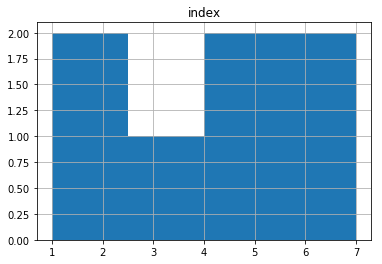

In [28]:
import pandas as pd

data = pd.read_csv("messy2.csv")
print(data)
print(data.keys())

data.head()
data.info()
print(data['gender'].value_counts())

import matplotlib.pyplot as plt
data.hist(bins=4)
plt.show()

If you have data with issues, you can clean the data.  You should always keep your original source data and write a program that will produce a cleaned version.  For some particular cases, (E.g. missing values) we can use existing code that we will incorporate into our pipeline.